# Spectra analysis

In [1]:
import pandas as pd
from pyteomics import mgf
import numpy as np
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
non_tryptic_test = pd.read_table("data/evaluation_data/PXD005231/spec_lib_PXD005231.peprec", sep=" ")
non_tryptic_test.drop(["Raw file", "Label"], axis=1, inplace=True)
psmid = "mzspec:PXD005231:20160513_TIL1_R1:scan:10909"

In [3]:
ms2pip_pred_non_tryptic = pd.read_csv("data/evaluation_data/PXD005231/spec_lib_PXD005231_HCD_pred_and_emp.csv")
peptide = ms2pip_pred_non_tryptic[ms2pip_pred_non_tryptic.spec_id == psmid]
peptide

,spec_id,charge,ion,ionnumber,mz,prediction,target
323852,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,2,B,1,129.10219,-3.489774,-4.130461
323853,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,2,B,2,257.16077,-6.471428,-7.756526
323854,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,2,B,3,394.21970,-8.204475,-6.581921
323855,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,2,B,4,451.24115,-7.305809,-7.754885
323856,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,2,B,5,550.30960,-5.262495,-6.398493
323857,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,2,B,6,664.35250,-6.408384,-5.046972
323858,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,2,B,7,763.42090,-7.565895,-6.192792
323859,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,2,B,8,850.45294,-6.989506,-7.821740
323860,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,2,Y,1,118.08621,-4.461832,-6.180883
323861,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,2,Y,2,205.11824,-5.013747,-4.543699


In [4]:
non_tryptic_test[non_tryptic_test.spec_id == psmid]


,spec_id,peptide,modifications,charge,psm_score,observed_retention_time
22319,mzspec:PXD005231:20160513_TIL1_R1:scan:10909,KQHGVNVSV,-,2.0,93.162,55.878


In [5]:
def retrieve_masses(filelist, psm_id):
    spectrum_dict = dict()
    found = False
    for mgf_file in filelist:
        for spectrum in mgf.read(mgf_file):
            if psm_id == spectrum['params']['title']:
                spectrum_dict["identifier"] = spectrum['params']['title']
                spectrum_dict["precursor_mz"] = spectrum['params']['pepmass'][0]
                spectrum_dict["precursor_charge"] = spectrum['params']['charge'][0]
                spectrum_dict["mz"] = spectrum['m/z array']
                spectrum_dict["intensity"] = spectrum['intensity array']
                spectrum_dict["retention_time"] = float(spectrum['params']['rtinseconds'])
                found = True
                break
        if found:
            break
    return spectrum_dict
        

In [6]:
filelist=["data/evaluation_data/PXD005231/spec_lib_PXD005231.mgf"]
spectrum_dict = retrieve_masses(filelist, psmid)

In [7]:
spectrum_dict["peptide"] = non_tryptic_test[non_tryptic_test.spec_id == psmid]["peptide"].values[0]
tic_norm = lambda x: x / np.sum(x)
spectrum_dict["intensity"] = tic_norm(spectrum_dict["intensity"])

In [8]:
spectrum_dict

{'identifier': 'mzspec:PXD005231:20160513_TIL1_R1:scan:10909',
 'precursor_mz': 484.269561767578,
 'precursor_charge': 2,
 'mz': array([104.6712265, 110.0712662, 116.6029739, 118.076683 , 118.0860901,
        119.0497742, 119.0889435, 121.0937424, 129.0657654, 129.1020355,
        130.0496368, 130.1053619, 132.0764008, 136.0755157, 138.0657959,
        141.1016388, 147.1121063, 152.9427948, 153.1017914, 155.1168213,
        155.1541748, 157.0610962, 157.0965118, 159.0971527, 159.1124573,
        160.1157227, 165.054184 , 167.1176453, 169.0969543, 171.1128845,
        173.0914764, 181.0601196, 182.0808105, 185.1283417, 185.1642151,
        186.1233826, 187.1073914, 187.1266479, 188.1113892, 195.0870361,
        197.0914917, 197.1639709, 199.0705261, 205.0981293, 205.1177521,
        206.1208191, 212.1170807, 212.1391144, 214.1181335, 216.0975037,
        217.0818329, 221.1028748, 221.1391754, 222.1233673, 226.0817413,
        230.1489258, 231.151947 , 239.1184082, 239.1494904, 240.13365

In [9]:
spectra = sus.MsmsSpectrum(spectrum_dict["identifier"], spectrum_dict["precursor_mz"],
                                        spectrum_dict["precursor_charge"], spectrum_dict["mz"], spectrum_dict["intensity"],
                                        retention_time=spectrum_dict["retention_time"],
                                        peptide=spectrum_dict["peptide"],
                                        ).scale_intensity('root').annotate_peptide_fragments(2, 'Da', ion_types='by')

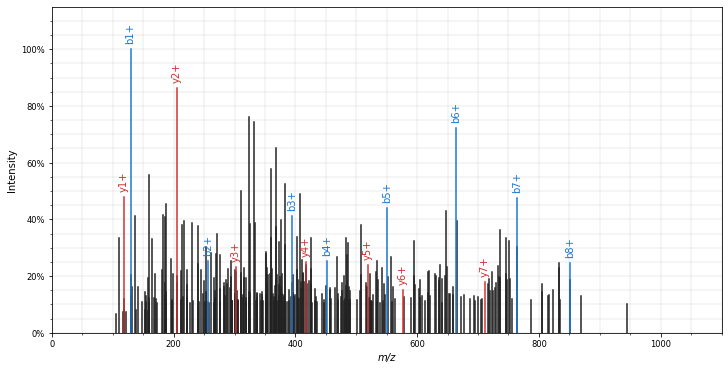

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectra)
plt.show()

In [11]:
annotation = sus.MsmsSpectrum(spectrum_dict["identifier"], spectrum_dict["precursor_mz"],
                                        spectrum_dict["precursor_charge"], spectrum_dict["mz"], spectrum_dict["intensity"],
                                        retention_time=spectrum_dict["retention_time"],
                                        peptide=spectrum_dict["peptide"],
                                        ).annotate_peptide_fragments(2, 'Da', ion_types='by').annotation

In [12]:
spectrum_dict["mz"] =list( peptide["mz"])
spectrum_dict["intensity"] = [(2 ** x) - 0.001 for x in peptide["target"]]

spectra = sus.MsmsSpectrum(spectrum_dict["identifier"], spectrum_dict["precursor_mz"],
                                        spectrum_dict["precursor_charge"], spectrum_dict["mz"], spectrum_dict["intensity"],
                                        retention_time=spectrum_dict["retention_time"],
                                        peptide=spectrum_dict["peptide"],
                                        ).scale_intensity('root').annotate_peptide_fragments(2, 'Da', ion_types='by')
annotation = sus.MsmsSpectrum(spectrum_dict["identifier"], spectrum_dict["precursor_mz"],
                                         spectrum_dict["precursor_charge"], spectrum_dict["mz"], spectrum_dict["intensity"],
                                         retention_time=spectrum_dict["retention_time"],
                                         peptide=spectrum_dict["peptide"],
                                         ).annotate_peptide_fragments(2, 'Da', ion_types='by').annotation

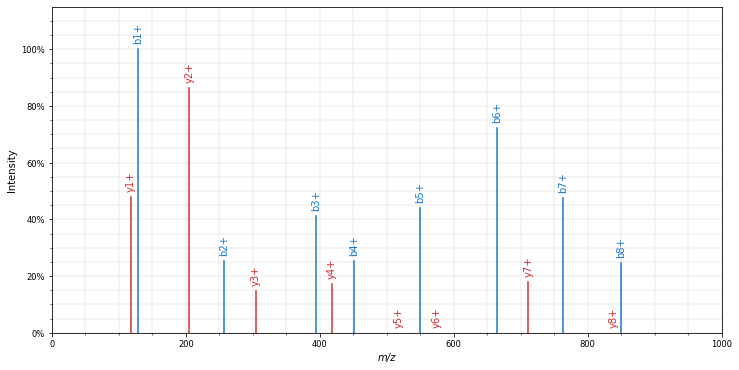

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectra)
plt.show()

In [14]:
mz = []
for ion in annotation:
    if ion == None:
        mz.append(False)
    elif ion.ion_type == "b":
        mz.append(False)
    elif ion.ion_type == "y":
        mz.append(True)

In [15]:
pred = peptide["prediction"][peptide.ion == "Y"]
mv = list(peptide["mz"][peptide.ion == "Y"])
pred

323860    -4.461832
323861    -5.013747
323862    -9.663980
323863    -6.822261
323864   -12.178550
323865   -10.110642
323866    -4.236749
323867    -5.926504
Name: prediction, dtype: float64

In [16]:
delog_pred = [(2 ** x) - 0.001 for x in pred]
delog_pred.reverse()
delog_pred

[0.015441620391800446,
 0.052040971119011875,
 -9.55314243366493e-05,
 -0.0007842796350689877,
 0.007836795419209768,
 0.00023268508863491261,
 0.029953642495767315,
 0.04437896453663289]

In [17]:
mz = []
for ion in annotation:
    if ion == None:
        mz.append(False)
    elif ion.ion_type == "b":
        mz.append(True)
    elif ion.ion_type == "y":
        mz.append(False)

In [18]:
pred_B = peptide["prediction"][peptide.ion == "B"]
delog_pred_B = [(2 ** x) - 0.001 for x in pred_B]
mv_B = list(peptide["mz"][peptide.ion == "B"])
mv_B

[129.10219,
 257.16077,
 394.2197,
 451.24115,
 550.3096,
 664.3525,
 763.4209,
 850.45294]

In [19]:
delog_pred.extend(delog_pred_B)
mv.extend(mv_B)

In [20]:
len(mv)

16

In [21]:
pred_spectra = sus.MsmsSpectrum(spectrum_dict["identifier"], spectrum_dict["precursor_mz"],
                                        spectrum_dict["precursor_charge"], mv, delog_pred,
                                        retention_time=spectrum_dict["retention_time"],
                                        peptide=spectrum_dict["peptide"],
                                        ).annotate_peptide_fragments(2, 'Da', ion_types='by')
spectra = sus.MsmsSpectrum(spectrum_dict["identifier"], spectrum_dict["precursor_mz"],
                                        spectrum_dict["precursor_charge"], spectrum_dict["mz"], spectrum_dict["intensity"],
                                        retention_time=spectrum_dict["retention_time"],
                                        peptide=spectrum_dict["peptide"],
                                        ).scale_intensity('root').annotate_peptide_fragments(2, 'Da', ion_types='by')

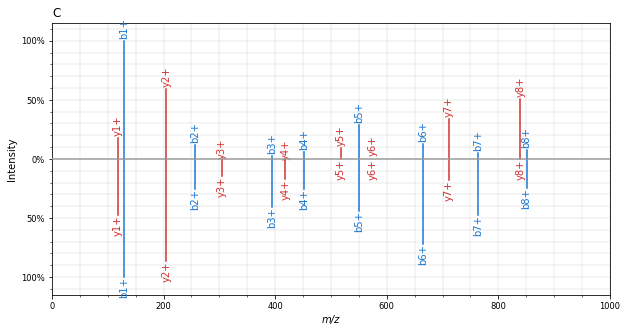

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('C', loc="left")
sup.mirror(pred_spectra, spectra , ax=ax)
plt.show()

In [23]:
ms2pip_HLA_pred = pd.read_csv("data/evaluation_data/PXD005231/spec_lib_PXD005231_Immuno-HCD_pred_and_emp.csv")
peptide_new = ms2pip_HLA_pred[ms2pip_HLA_pred.spec_id == psmid]

In [24]:
pred_current = list(peptide_new["prediction"][peptide_new.ion == "Y"])
#pred_10096_current.reverse()
pred_current_B = list(peptide_new["prediction"][peptide_new.ion == "B"])
pred_current.extend(pred_current_B)
delog_pred_current = [(2 ** x) - 0.001 for x in pred_current]


In [25]:
pred_spectra_current = sus.MsmsSpectrum(spectrum_dict["identifier"], spectrum_dict["precursor_mz"],
                                        spectrum_dict["precursor_charge"], mv, delog_pred_current,
                                        retention_time=spectrum_dict["retention_time"],
                                        peptide=spectrum_dict["peptide"],
                                        ).annotate_peptide_fragments(2, 'Da', ion_types='by')

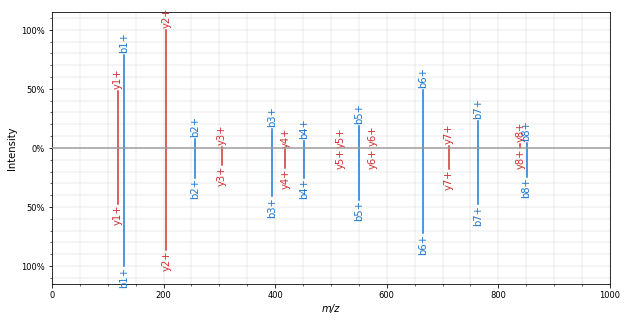

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
sup.mirror(pred_spectra_current, spectra, ax=ax)
plt.show()

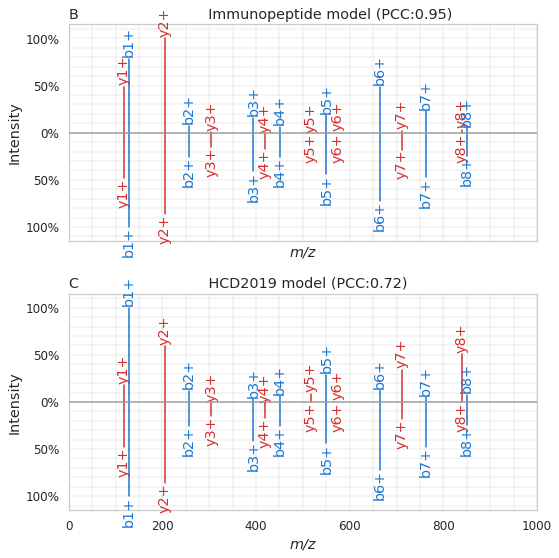

In [27]:
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,8))
ax1.set_ylim(1.3,-1.3)
ax1 = sup.mirror(pred_spectra_current, spectra ,ax=ax1)
ax1.set_title("B                            Immunopeptide model (PCC:0.95)", loc="left")
ax2 = sup.mirror(pred_spectra, spectra, ax=ax2)
ax2.set_title("C                            HCD2019 model (PCC:0.72)", loc="left")
plt.tight_layout()
plt.savefig("data/Figures/Figure1BC.svg")
plt.show()

# Training data comparison

In [28]:
from matplotlib_venn import venn2
import pandas as pd

In [29]:
training_pep = pd.read_table("data/training_data/chymotrypsin_immunopeptide/immunopeptide_chymotrypsin.peprec", sep=" ")[["spec_id","peptide", "modifications", "charge"]]

tryptic_eval = pd.read_table("data/evaluation_data/PXD008034/HCD_PXD008034_Ecoli.peprec", sep=" ")[["spec_id","peptide", "modifications", "charge"]]
tryptic_eval["testset"] = "proteomics data"

HLAI_eval = pd.read_table("data/evaluation_data/PXD005231/spec_lib_PXD005231.peprec", sep=" ")[["spec_id","peptide", "modifications", "charge"]]
HLAI_eval["testset"] = "HLA-I"

HLAII_eval = pd.read_table("data/evaluation_data/PXD020011/spec_lib_pxd020011.peprec", sep=" ")[["spec_id","peptide", "modifications", "charge"]]
HLAII_eval["testset"] = "HLA-II"

chymo_eval = pd.read_table("data/evaluation_data/PXD010154/test_spec_lib_PXD010154.peprec", sep=" ")[["spec_id","peptide", "modifications", "charge"]]
chymo_eval["testset"] = "chymotrypsin"

evaluation_data = pd.concat([tryptic_eval, HLAI_eval, HLAII_eval, chymo_eval])
evaluation_data["upeps"] = list(zip(evaluation_data.peptide, evaluation_data.modifications, evaluation_data.charge))


In [30]:
# with open("data/training_upeps.pkl", "wb") as f:
#     pickle.dump(train_overlap, f)

In [31]:
training_pep.spec_id.str.extract(r"mzspec:(PXD[0-9]{6}|True):", expand=False).value_counts()

PXD000394    134891
PXD004894    129011
PXD006939    120427
PXD012308     61590
PXD010154     60598
PXD009925     17339
Name: spec_id, dtype: int64